In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(centers=2, random_state=42)

In [3]:
X.shape, y.shape

((100L, 2L), (100L,))

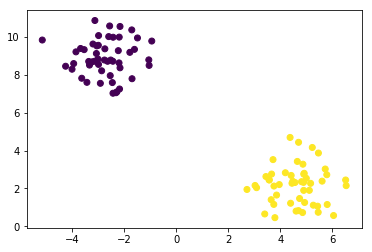

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)


In [5]:
class CustomLosgisticReg:
    
    def __init__(self, lr=.01, iters=30):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        errors = []
        
        for i in range(self.iters):
            error = self.gradient_decent(X, y)
            errors.append(error)
            
        return errors
            
    def gradient_decent(self, X, y):
        delta_theta, error = self.gradient(X, y)
        self.theta_ += delta_theta
        return error
        
    def gradient(self, X, y):
        ya =  y.reshape(-1, 1)
        yh = self.hypo(X)
        
        dneglldt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dneglldt * self.lr
        
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*(np.log(1-yh))))
        
        return delta_theta, error
        
        
    def hypo(self, X):
        g = np.dot(X, self.theta_)
        return 1 / (1 + np.exp(-g))
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        result = self.hypo(X)
        return (result.flatten() > .5).astype(int)
    
    def score(self,X,y):
        yp = self.predict()
        
        return np.mean()

In [16]:
model = CustomLosgisticReg(iters=5000)

In [17]:
error = model.fit(X, y)

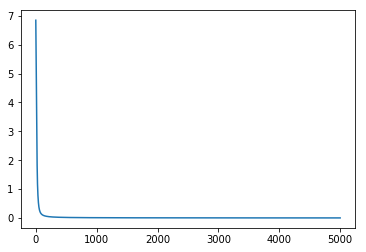

In [18]:
plt.plot(error)


In [19]:
model.predict(X)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])